## 0224024 何昀儒

In [136]:
# coding:utf-8

In [137]:
from urllib2 import urlopen
from contextlib import closing
url = "http://aima.cs.berkeley.edu/data/iris.csv"
with closing(urlopen(url)) as u, open("iris.csv", "w") as f:
 f.write(u.read())

In [138]:
import os

In [139]:
os.getcwd()

'/home/jovyan/work'

In [140]:
os.listdir('/home/jovyan/work')

['laudai_homework',
 'laudai_Midterm',
 '\xe5\x80\x8b\xe4\xba\xba \xe6\x96\x87\xe5\xad\x97\xe5\x88\x86\xe9\xa1\x9e \xe4\xb8\x8a\xe8\xaa\xb2\xe7\x9a\x84\xe7\xb7\xb4\xe7\xbf\x92.ipynb',
 'iris.csv',
 '\xe5\xae\x98\xe6\x96\xb9Decision Tree\xe6\xaa\x94\xe6\xa1\x88\xe7\x9b\xb4\xe6\x8e\xa5\xe6\xb8\xac\xe8\xa9\xa6.ipynb',
 '0224024_midterm_nkfust_cloud_computing.ipynb',
 '.ipynb_checkpoints',
 'SparkTextMining-Scala-05-50-\xe6\x9c\x9f\xe4\xb8\xad\xe5\xb0\x8f\xe5\xb0\x88\xe9\xa1\x8c--imdb\xe9\x9b\xbb\xe5\xbd\xb1\xe8\xa9\x95\xe8\xab\x96\xe6\x83\x85\xe7\xb7\x92\xe5\x88\x86\xe9\xa1\x9e-Scala\xe7\x89\x88.ipynb',
 'spark-warehouse',
 'homework_example',
 'dataset']

In [141]:
from numpy import genfromtxt, zeros
# read the first 4 columns
data = genfromtxt("iris.csv",delimiter=",",usecols=(0,1,2,3))
# read the fifth column
# this fifth column is the label (or target)
target = genfromtxt("iris.csv",delimiter=",",usecols=(4),dtype=str) 

In [142]:
print data.shape
print target.shape

(150, 4)
(150,)


In [143]:
print set(target) # build a collection of unique elements set(["setosa", "versicolor", "virginica"])

set(['setosa', 'versicolor', 'virginica'])


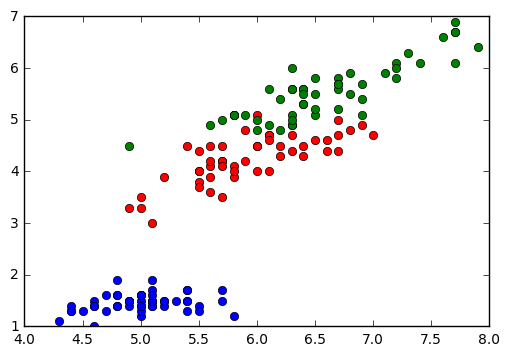

In [144]:
#show the data plot 
from pylab import plot, show
plot(data[target=="setosa",0],data[target=="setosa",2],"bo")
plot(data[target=="versicolor",0],data[target=="versicolor",2],"ro")
plot(data[target=="virginica",0],data[target=="virginica",2],"go")
show()

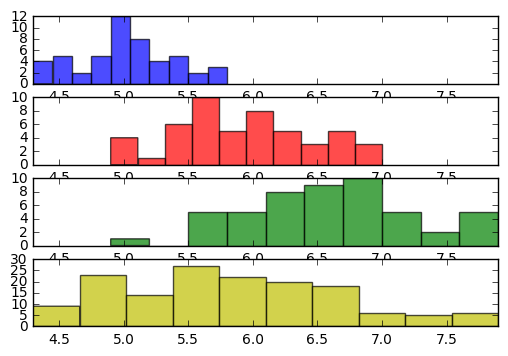

In [145]:
from pylab import figure, subplot, hist, xlim, show
xmin = min(data[:,0])
xmax = max(data[:,0])
figure()
subplot(411) # distribution of the setosa class (1st, on the top)
hist(data[target=="setosa",0],color="b",alpha=.7)
xlim(xmin,xmax)
subplot(412) # distribution of the versicolor class (2nd)
hist(data[target=="versicolor",0],color="r",alpha=.7)
xlim(xmin,xmax)
subplot(413) # distribution of the virginica class (3rd)
hist(data[target=="virginica",0],color="g",alpha=.7)
xlim(xmin,xmax)
subplot(414) # global histogram (4th, on the bottom)
hist(data[:,0],color="y",alpha=.7)
xlim(xmin,xmax)
show()

# classification

In [146]:
t = zeros(len(target))
t[target == "setosa"] = 1
t[target == "versicolor"] = 2
t[target == "virginica"] = 3

## Use Support Vector Machines (SVM)   

In [147]:
from sklearn import svm

In [148]:
 clf = svm.SVC()

In [149]:
clf.fit(data,t)# training on the iris dataset

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
print clf.predict(data[0])

[ 1.]


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [151]:
print t[0]

1.0


In [152]:
from sklearn import cross_validation
train, test, t_train, t_test = cross_validation.train_test_split(data, t,test_size=0.4, random_state=0)

In [153]:
clf.fit(train,t_train) # train
print clf.score(test,t_test) # test

0.95


In [154]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(clf.predict(test),t_test)

[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]


In [155]:
from sklearn.metrics import classification_report
print classification_report(clf.predict(test), t_test,target_names=["setosa", "versicolor", "virginica"])
 

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.96      0.92      0.94        24
  virginica       0.90      0.95      0.93        20

avg / total       0.95      0.95      0.95        60



In [156]:
from sklearn.cross_validation import cross_val_score
# cross validation with 6 iterations
scores = cross_val_score(clf, data, t, cv=6)
print scores

[ 0.96296296  1.          1.          0.91666667  1.          1.        ]


In [157]:
from numpy import mean
print mean(scores)

0.979938271605


#### On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained:

In [158]:
lin_clf = svm.LinearSVC()

In [159]:
lin_clf.fit(data,t) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [160]:
print lin_clf.predict(data[0])

[ 1.]


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [161]:
print t[0]

1.0


In [162]:
from sklearn import cross_validation
train, test, t_train, t_test = cross_validation.train_test_split(data, t,test_size=0.4, random_state=0)

In [163]:
lin_clf.fit(train,t_train) # train
print lin_clf.score(test,t_test) # test

0.916666666667


In [164]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(lin_clf.predict(test),t_test)

[[16  0  0]
 [ 0 20  2]
 [ 0  3 19]]


In [165]:
from sklearn.metrics import classification_report
print classification_report(lin_clf.predict(test), t_test,target_names=["setosa", "versicolor", "virginica"])

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.87      0.91      0.89        22
  virginica       0.90      0.86      0.88        22

avg / total       0.92      0.92      0.92        60



In [166]:
from sklearn.cross_validation import cross_val_score
# cross validation with 6 iterations
scores = cross_val_score(lin_clf, data, t, cv=6)
print scores

[ 1.          1.          0.95833333  0.875       0.95833333  1.        ]


In [167]:
from numpy import mean
print mean(scores)

0.965277777778
